# Cov-SSI on shear frame - stabilization analysis example

In [1]:
import koma.oma, koma.plot

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend, welch, resample

import matplotlib.pyplot as plt


def stabplot_simple(lambd, orders, ax=None):
    if ax is None:
        ax = plt.gca()
        
    plt.gcf().set_figwidth(12)
        
    ax.plot(np.abs(lambd)/2/np.pi, orders, '.')
    ax.set_xlabel('$f_n$ [Hz]')
    ax.set_ylabel('Order, n')
    
    return ax
    

## Load data and define reference solution

In [3]:
data = np.load('./data/data_shearframe.npy')
fs = 12.0
tmax = 1200
t = np.arange(0, tmax, 1/fs)
levels = data.shape[1] #number of channels

# Load reference modal properties
omega_n_ref = np.load('./data/omega_n.npy')
xi_ref = np.load('./data/xi_ref.npy')
phi_ref = np.load('./data/phi_ref.npy')

## Add artificial noise

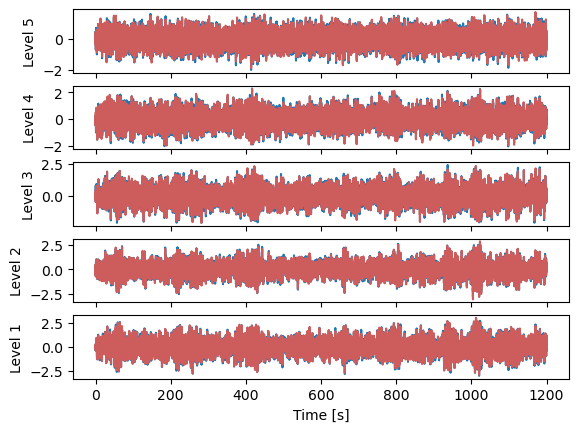

In [21]:
noise_factor = 0.2
noise = np.std(data) * noise_factor
data_noised = data + noise*np.random.randn(data.shape[0], data.shape[1])

fig, ax = plt.subplots(nrows=levels, ncols=1, num=1, sharex =True)

for level, axi in enumerate(ax[::-1]):    
    axi.plot(t, data_noised[:,level])
    axi.plot(t, data[:,level], color='IndianRed', alpha=1)
    axi.set_ylabel(f'Level {level+1}')

__ = ax[-1].set_xlabel('Time [s]')


## Define SSI parameters

In [45]:
i = 30
orders_input = np.arange(2, 60+2, 2)

## Cov-SSI call

In [47]:
lambd, phi, orders = koma.oma.covssi(data_noised, fs, i, orders_input, return_flat=True) # find poles by Cov-SSI

*** Covariance-driven SSI algorithm for OMA ***
> Establishing Hankel/Toeplitz matrices
  >> Correlation estimation
  >> Matrix stacking
> Establishing weighting matrices
  >> Weighting requested: NONE
> Computing SVD
> Computing state matrix for each order to establish modes
> Computation completed


## Stabilization analysis

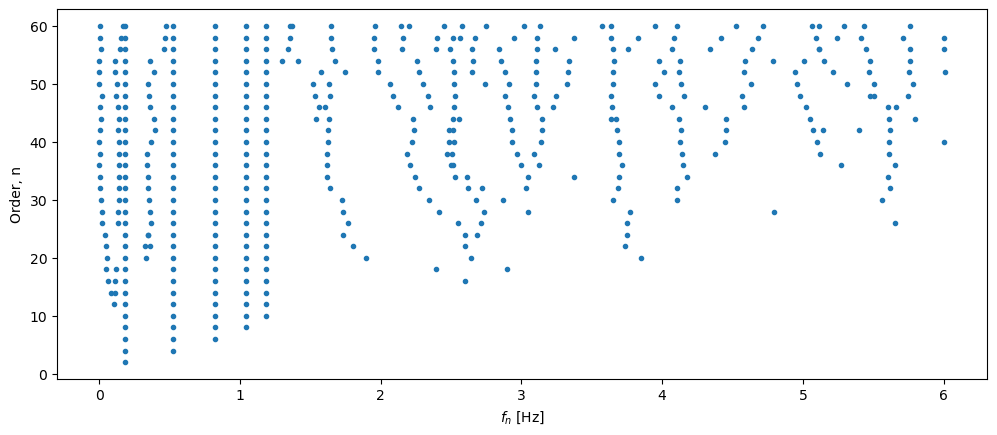

In [49]:
ax = stabplot_simple(lambd, orders)
xlim = ax.get_xlim()

(-0.30034674638944164, 6.308651251454287)

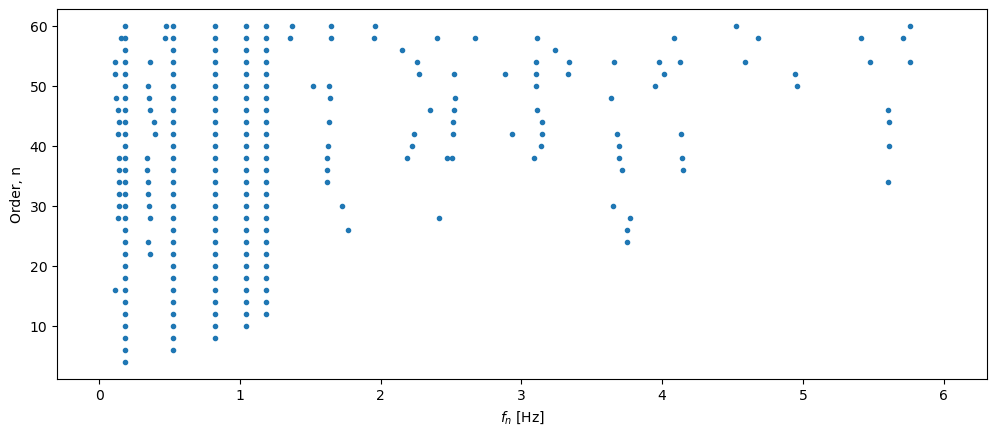

In [51]:
s = 1
stabcrit = {'freq':0.1, 'damping': 0.2, 'mac': 0.2}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit, use_legacy=False) # Stable poles

ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)

(-0.30034674638944164, 6.308651251454287)

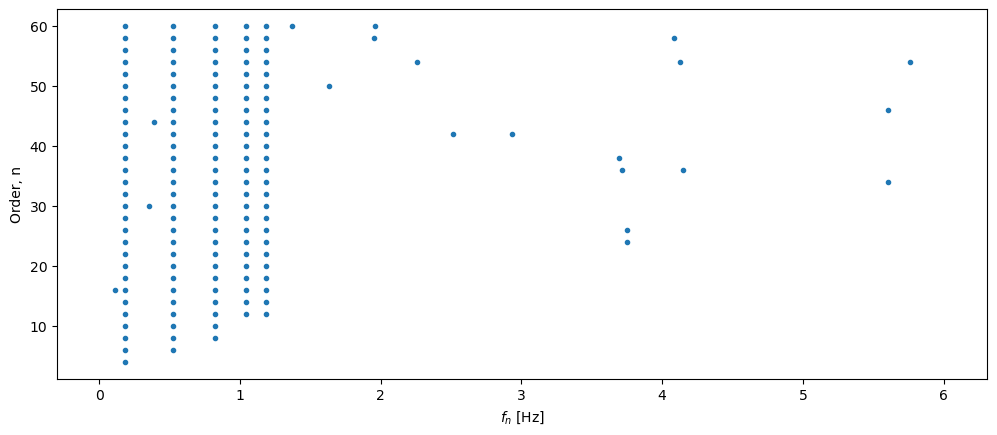

In [53]:
s = 1
stabcrit = {'freq':0.01, 'damping': 0.05, 'mac': 0.05}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit, use_legacy=False) # Stable poles
ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)

(-0.30034674638944164, 6.308651251454287)

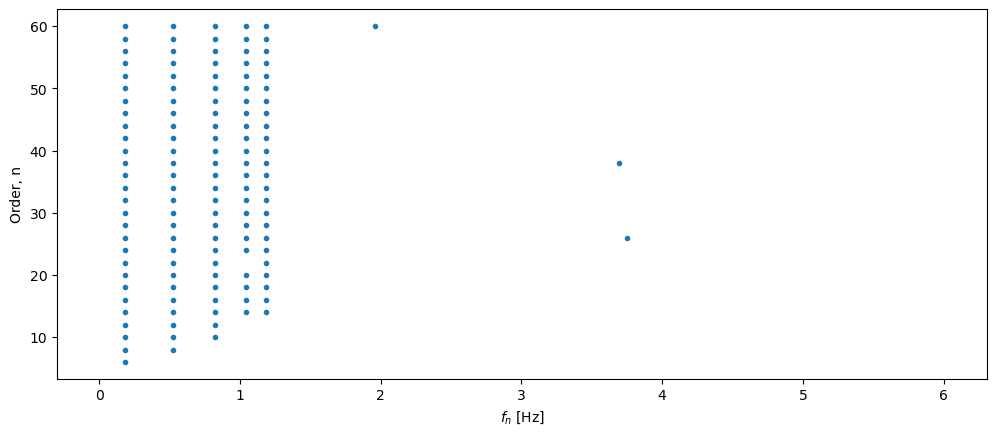

In [55]:
s = 2
stabcrit = {'freq':0.01, 'damping': 0.05, 'mac': 0.05}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit, use_legacy=False) # Stable poles

ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)

(-0.30034674638944164, 6.308651251454287)

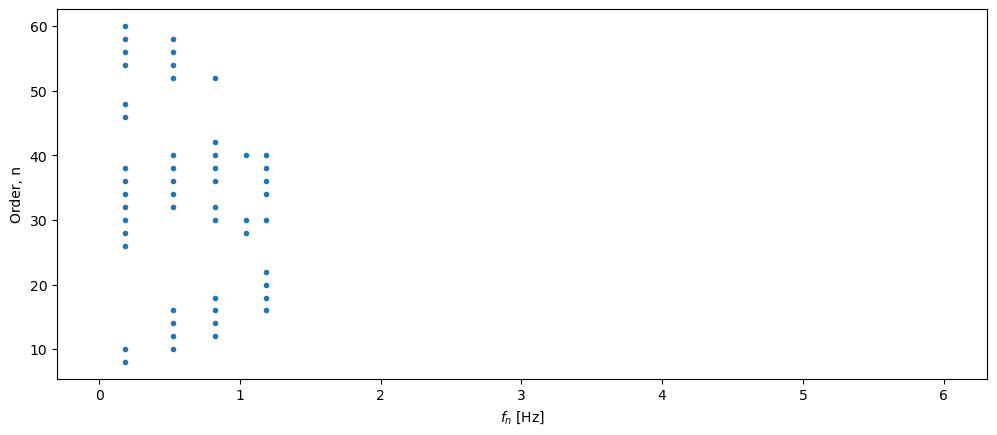

In [59]:
s = 3
stabcrit = {'freq':0.01, 'damping': 0.01, 'mac': 0.1}

lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, 
                                                                        stabcrit=stabcrit) # Stable poles

ax = stabplot_simple(lambd_stab, orders_stab)
ax.set_xlim(xlim)